## <center>KEMENTRIAN PENDIDIKAN DAN KEBUDAYAAN
## <center>PROGRAM STUDI GEOFISIKA JURUSAN FISIKA
## <center>FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM
# <center>UNIVERSITAS GADJAH MADA
***
## <center>PRAKTIKUM METODE ANALISIS GEOFISIKA 
## <center>ACARA 6. SISTEM LTI - KONVOLUSI</center>

# <p>

<img src="http://www.luk.staff.ugm.ac.id/logo/UGM/Resmi/Hitam-putih.gif" width="300" height="300" />
 
# <p>
# <p>
# <p>
### <center>DISUSUN OLEH : 
### <center>TAUFIQURRAHMAN SAGAF KELREY
### <center>19/442442/PA/19191
# <p>   
### <center>ASISTEN : 
### <center>TIM ASISTEN PRAKTIKUM METODE ANALISIS GEOFISIKA 1 2021
***
## <center>YOGYAKARTA
## <center>NOVEMBER
## <center>2021

### soal
##### a.	Carilah impuls response dari Filter Tapis Tinggi (High-pass Filter), terapkan filter metode konvolusi dengan menggunakan impuls response tersebut dan tulis kode programnya
##### b.	Terapkan filter tersebut terhadap data sintetik (sweep) dan data real


In [1]:
#memasukkan modul-modul
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import mpmath as mp

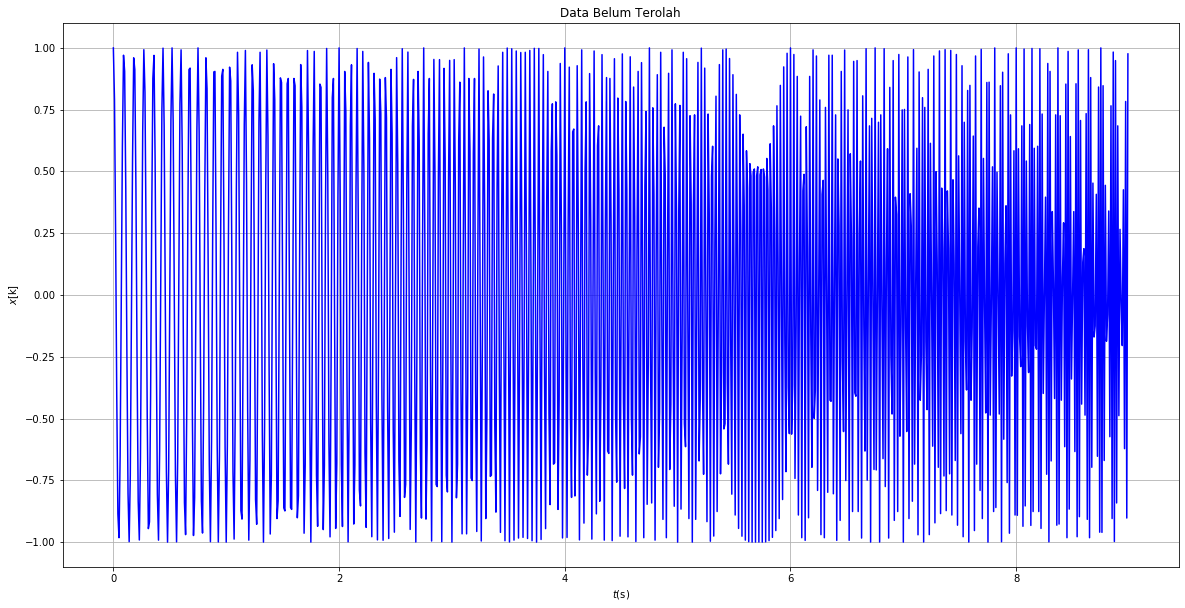

In [108]:
#Data sweep
dt = 0.01 #mendefinisikan step
endtime = 9 #mendefinisikan lama gelombang
f1 = 1 #frekuensi awal
f2 = 19 #frekuensi akhir
t = np.arange(0,endtime, dt) #mendefinisikan array t
a = (f2-f1)/endtime #mendefinisikan amplitudo
f = f2*1.5-a*abs(endtime-t) #mendefinisikan fungsi sweep
x = np.cos(2*np.pi*f*t)#mendefinisikan sinyal

#plot data sweep
plt.figure(figsize=(20,10)) #mengatur ukuran gambar
plt.plot(t,x, 'b-') #memetakan x terhadap t
plt.grid()
plt.title("Data Belum Terolah") #memberikan judul grafik
plt.xlabel("$t$(s)") #memberikan label sumbu x
plt.ylabel("$x$[k]") #memberikan label sumbu y
plt.show() #menampilkan grafik

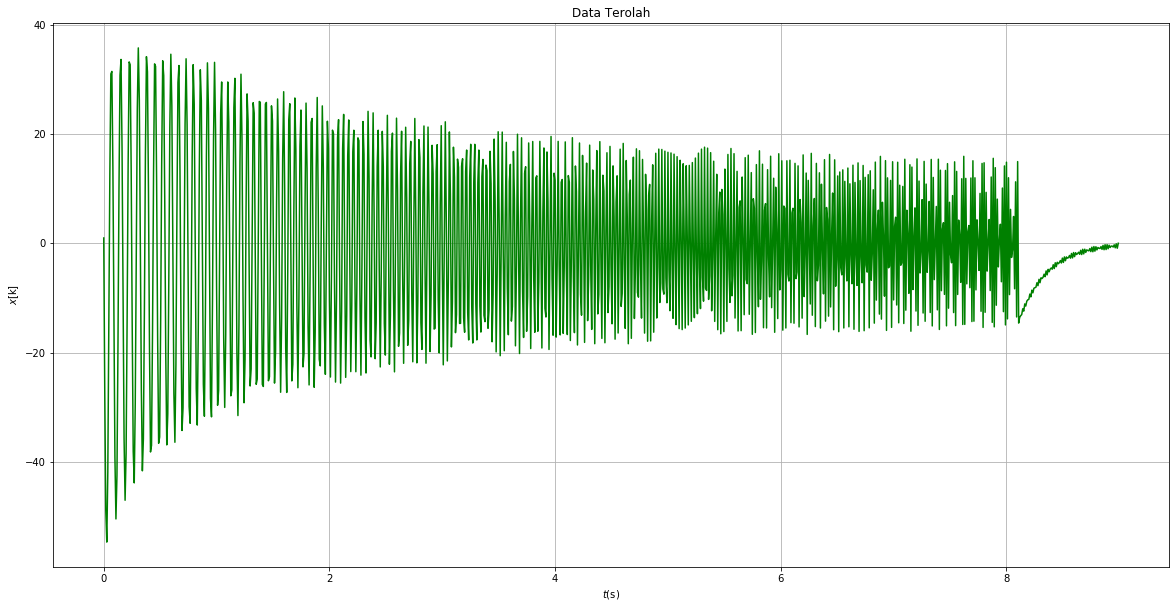

In [109]:
#impuls respon

time = np.arange(0, 100,1) #mendefinisikan array
#nilai parameter
R = 0.07
C = 4
T = dt

#mendefinisikan variabel
a0 = 1+(R*C/T)
a1 = -(R*C/T)
b0 = R*C/T
b1 = -(R*C/T)

#mendefinisikan array untuk impuls respon
h = np.zeros(time.size)
h[0] = b0/a0

#memasukkan nilai impuls respon untuk setiap i pada array h
for i in range (time.size):
    if i > 0:
        h[i] = ((-1)**time[i-1])*(((b1*a1**time[i-1])/a0**time[i])+((b0*a1**time[i])/a0**time[i]))

        
#konvolusi
#mendefinisikan variabel
N = x.size
M = h.size
y = np.zeros(N+M-1) #mendefinisikan array hasil konvolusi

#memasukkan nilai hasil konvolusi ke dalam array y
for j in range (0, N+M-1):
    j1 = j
    tmp = 0.0
    for k in range(0, M-1):
        if (j1 >= 0 and j1 < N):
            tmp = tmp + x[j1]*h[k]
        j1 = j1 - 1
        y[j] = tmp

#mendefinisikan array asal ty untuk array hasil konvolusi y
dty = endtime / (N+M-1)
ty = np.arange (0.0, endtime, dty)

#plot data sweep
plt.figure(figsize=(20,10)) #mengatur ukuran gambar
plt.plot(ty,y, 'g-') #memetakan y terhadap ty
plt.grid()
plt.title("Data Terolah") #memberikan judul grafik
plt.xlabel("$t$(s)") #memberikan label sumbu x
plt.ylabel("$x$[k]") #memberikan label sumbu y
plt.show() #menampilkan grafik


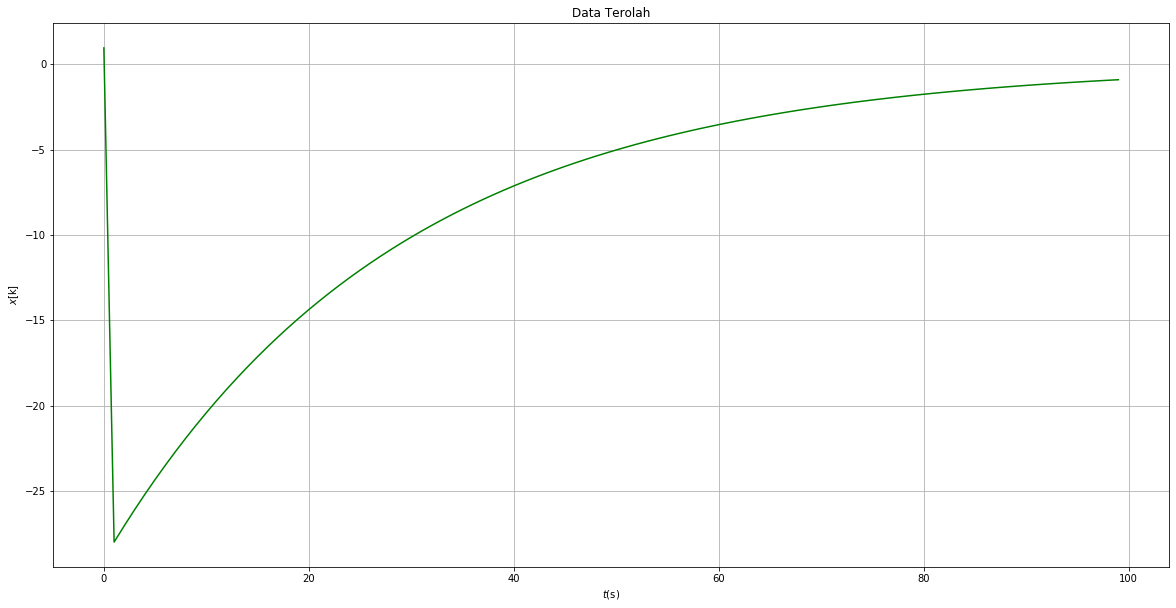

0.4398229715025711


In [110]:
#plot 
plt.figure(figsize=(20,10)) #mengatur ukuran gambar
plt.plot(time,h, 'g-') #memetakan y terhadap ty
plt.grid()
plt.title("Data Terolah") #memberikan judul grafik
plt.xlabel("$t$(s)") #memberikan label sumbu x
plt.ylabel("$x$[k]") #memberikan label sumbu y
plt.show() #menampilkan grafik

R = 0.07
C = 4
print(1/2*np.pi*R*C)

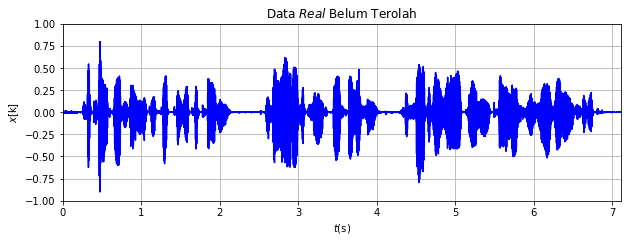

341033

In [2]:
#membaca file rekaman
x, fs = sf.read('speech.wav') #import data rekaman suara
t = np.arange(len(x))/fs #mendefinisikan interval waktu
dt = 1/fs

#plot data real
plt.figure(figsize=(10,15)) #mengatur ukuran gambar
plt.subplot(4,1,4) #grafik 1
plt.plot(t,x, 'b-') #memetakan gelombang rekaman suara
plt.grid()
plt.ylabel('$x$[k]') #memberi label pada sumbu vertikal
plt.xlabel('$t$(s)') #memberi label pada sumbu mendatar
plt.axis([0,t[-1], -1, 1]) #mengatur nilai min. dan maks. sumbu horizontal dan sumbu vertikal
plt.title('Data $Real$ Belum Terolah') #memberi judul pada grafik
plt.show()

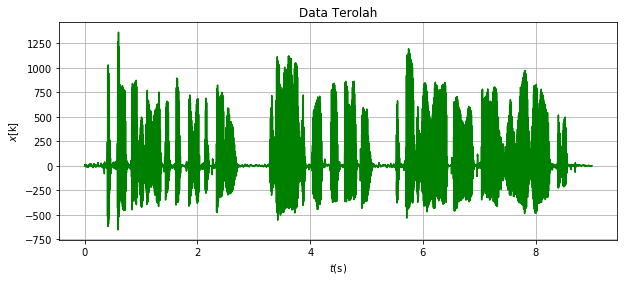

In [112]:
#impuls respon
time = np.arange(0, 100,1) #mendefinisikan array
#nilai parameter
R = 0.05
C = 0.03
T = dt

#mendefinisikan variabe
a0 = 1+(R*C/T)
a1 = -(R*C/T)
b0 = R*C/T
b1 = -(R*C/T)

#mendefinisikan array untuk impuls respon
h = np.zeros(time.size)
h[0] = b0/a0

#memasukkan nilai impuls respon untuk setiap i pada array h
for i in range (time.size):
    if i > 0:
        h[i] = ((-1)**time[i-1])*(((b1*a1**time[i-1])/a0**time[i])+((b0*a1**time[i])/a0**time[i]))

#konvolusi
#mendefinisikan variabel
N = x.size
M = h.size
y = np.zeros(N+M-1)

#memasukkan nilai hasil konvolusi ke dalam array y
for j in range (0, N+M-1):
    j1 = j
    tmp = 0.0
    for k in range(0, M-1):
        if (j1 >= 0 and j1 < N):
            tmp = tmp + x[j1]*h[k]
        j1 = j1 - 1
        y[j] = tmp
        
#mendefinisikan array asal ty untuk array hasil konvolusi y
dty = endtime / (N+M-1)
ty = np.arange (0.0, endtime, dty)

#plot data sweep
plt.figure(figsize=(10,4))
plt.plot(ty,y, 'g-') #memetakan y terhadap ty
plt.grid()
plt.title("Data Terolah") #memberikan judul grafik
plt.xlabel("$t$(s)") #memberikan label sumbu x
plt.ylabel("$x$[k]") #memberikan label sumbu y
plt.show() #menampilkan grafik

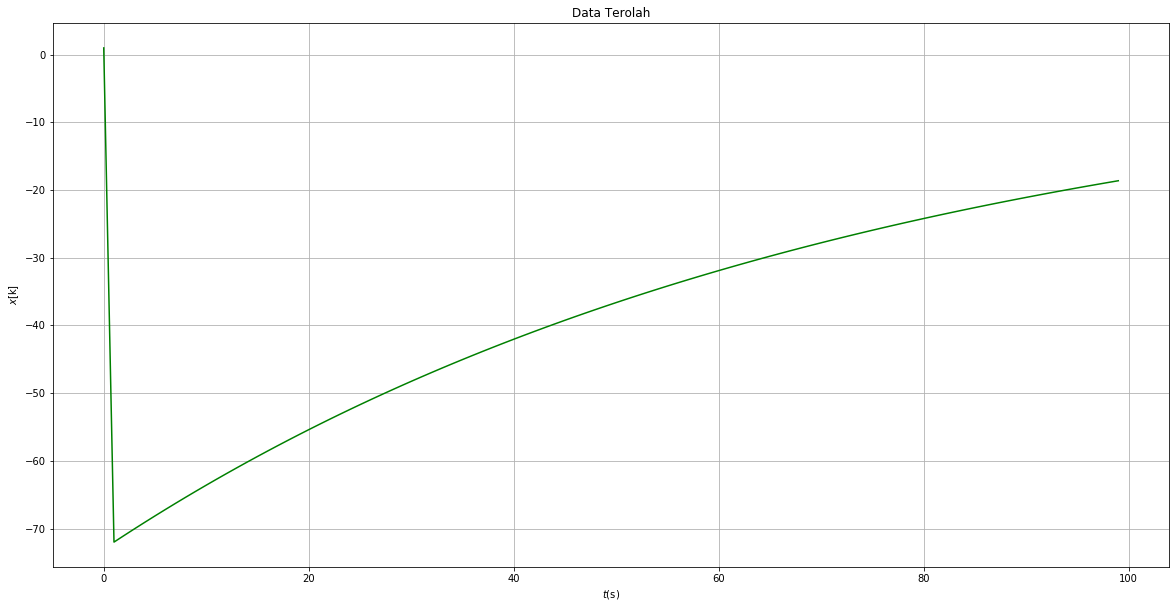

0.002356194490192345


In [113]:
#plot 
plt.figure(figsize=(20,10)) #mengatur ukuran gambar
plt.plot(time,h, 'g-') #memetakan y terhadap ty
plt.grid()
plt.title("Data Terolah") #memberikan judul grafik
plt.xlabel("$t$(s)") #memberikan label sumbu x
plt.ylabel("$x$[k]") #memberikan label sumbu y
plt.show() #menampilkan grafik

R = 0.05
C = 0.03
print(1/2*np.pi*R*C)